In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import sys
%matplotlib inline

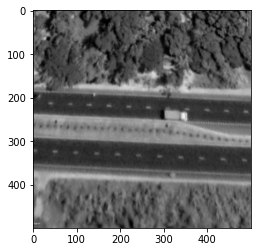

In [2]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image = mpimg.imread('/content/drive/MyDrive/7334_p.png',0)
# grayscale the image
grayscaled = grayscale(image)
plt.imshow(grayscaled, cmap='gray')

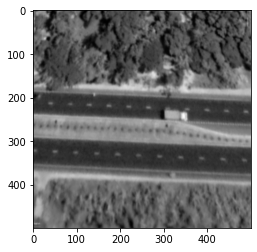

In [3]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0.8)
  
# apply gaussian blur
kernelSize = 5
gaussianBlur = gaussian_blur(grayscaled, kernelSize)
plt.imshow(gaussianBlur,cmap='gray')

[[120 120 119 ... 116 113 112]
 [117 117 116 ... 118 115 114]
 [114 114 112 ... 119 117 116]
 ...
 [ 78  82  85 ... 103 108 112]
 [ 73  74  75 ... 101 104 107]
 [ 73  74  74 ... 100 102 104]]


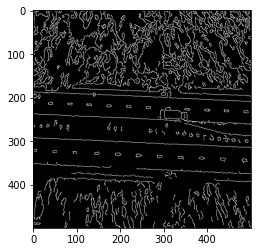

In [4]:
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

# canny
minThreshold = 50
maxThreshold = 100
print(gaussianBlur)
#slice1Copy = np.uint8(gaussianBlur)
edgeDetectedImage = canny(gaussianBlur, minThreshold, maxThreshold)
plt.imshow(edgeDetectedImage,cmap='gray')

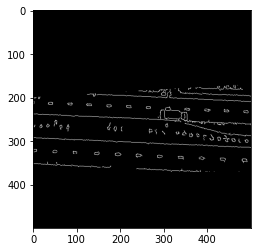

In [5]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with 
    #depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
  
#apply mask
lowerLeftPoint = [0, 370]
upperLeftPoint = [0, 200]
upperRightPoint = [500, 170]
lowerRightPoint = [500, 370]

pts = np.array([[lowerLeftPoint, upperLeftPoint, upperRightPoint, 
lowerRightPoint]], dtype=np.int32)
masked_image = region_of_interest(edgeDetectedImage, pts)
plt.imshow(masked_image,cmap='gray')


(2,)
184.0
1.6231562
(0, 184)
(500, 210)
(2,)
236.0
1.6231562
(0, 236)
(500, 262)
(2,)
290.0
1.6231562
(0, 290)
(500, 316)
(2,)
351.0
1.6231562
(0, 351)
(500, 377)
(2,)
239.0
1.6057029
(0, 239)
(500, 256)
(2,)
296.0
1.6057029
(0, 296)
(500, 313)
(2,)
294.0
1.6057029
(0, 294)
(500, 311)
(2,)
178.0
1.6057029
(0, 178)
(500, 195)
(2,)
191.0
1.6057029
(0, 191)
(500, 208)
(2,)
230.0
1.6406095
(0, 230)
(500, 265)


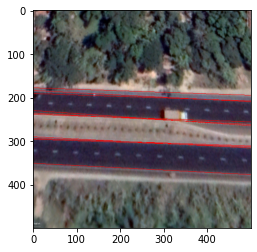

In [6]:
lines = cv2.HoughLines(masked_image,1.0,np.pi/180,90) 
lines = lines.reshape((lines.shape[0],lines.shape[2]))
for line in lines:
    rho = line[0]  # The first element is the distance rho
    theta = line[1]  # The second element is the angle theta.

    print(line.shape)
    print(rho)
    print(theta)
    if (theta < (np.pi /4)) or (theta > (3 *np.pi/4.0)):  # Vertical line
        # The intersection of the line and the first line
        pt1 = (int(rho /np.cos(theta)),0)
        # The focus of the line and the last line
        pt2 = (int((rho -result.shape[0] *np.sin(theta) ) /np.cos(theta)) ,result.shape[0])
        # Draw a white line
        #cv2.line( result, pt1, pt2, (255))
    else:  # Horizontal straight line
        # The intersection of the line with the first row
        pt1 = (0 ,int(rho /np.sin(theta)))
        print(pt1)
        # The intersection of the line with the last column
        pt2 = (image.shape[1], int((rho -image.shape[1] *np.cos(theta) ) /np.sin(theta)))
        print(pt2)
        # Draw a straight line
        cv2.line(image, pt1, pt2, (255), 1)


plt.imshow(image,cmap='gray')
